In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Find/Union Algorithm for the percolation problem

In [2]:
class FindUnion:
    def __init__(self,n):
        self.n = n  # caching to avoid computing len(matrix)
        self.matrix = np.zeros((n,n), dtype=int)
        self.clusters = []
        self.cluster_stats = []
    
    def one_block(self, matrix):
        """
        Write a 1 in a given matrix at random.
        """
        i, j = np.random.choice(self.n, size=2)
        matrix[i, j] = 1
        return i, j
    
    def negbrs(self, i, j):
        """
        Check if the neighbors are part of a cluster.
        If there is only one cluster linked to the neighbor you append to this cluster.
        If there is more than one cluster linked, you merge.
        """
        supercluster = set()

        # union applied here directly
        
        for k, cluster in enumerate(self.clusters):
            if (i+1, j) in cluster:
                supercluster |= cluster  # join neighbor cluster to supercluster
                del self.clusters[k]  # remove neighbor cluster from clusters
                break  # only one cluster may contain the neighbor
        
        for k, cluster in enumerate(self.clusters):
            if (i, j+1) in cluster:
                supercluster |= cluster  # join neighbor cluster to supercluster
                del self.clusters[k]  # remove neighbor cluster from clusters
                break  # only one cluster may contain the neighbor
        
        for k, cluster in enumerate(self.clusters):
            if (i-1, j) in cluster:
                supercluster |= cluster  # join neighbor cluster to supercluster
                del self.clusters[k]  # remove neighbor cluster from clusters
                break  # only one cluster may contain the neighbor
        
        for k, cluster in enumerate(self.clusters):
            if (i, j-1) in cluster:
                supercluster |= cluster  # join neighbor cluster to supercluster
                del self.clusters[k]  # remove neighbor cluster from clusters
                break  # only one cluster may contain the neighbor

        if supercluster:
            self.clusters.append(supercluster)  # add supercluster to clusters
            return True
        else:
            return False
    
    def image_matrix(self):
        """Plot image of the matrix"""
        plt.imshow(self.matrix)
        plt.show()
    
    def write_block(self):
        """
        Write a 1 in the matrix and feeds cluster dictionary using negbrs.
        """
        i, j = self.one_block(self.matrix)
        if not self.negbrs(i, j):
            self.clusters.append({(i, j)})
    
    def cluster_lengths(self):
        """
        Give a np.array with the number of clusters.
        """
        return np.array([len(cluster) for cluster in self.clusters]).sort()
    
    def plot_histograms(self):
        """
        Plot the histogram.
        """
        for i in self.cluster_stats:
            plt.hist(i)
        plt.show()
   
    def check_percolation(self):
        for cluster in self.clusters:
            for i in range(self.n):
                if (0, i) in cluster and (self.n-1, i) in cluster:
                    return True
        return False
    
    def iterate(self, m, plot=False):
        """
        Do m iterations and write statistics for each step.
        Plot these interactions puting plot = True
        """
        for _ in range(m):
            self.write_block()
            self.cluster_stats.append(self.cluster_lengths())
            check = self.check_percolation()
            if plot:
                self.image_matrix()
            if check:
                print("Percolated")
                break

In [3]:
n = 160
b = FindUnion(n)

In [4]:
%%time
b.iterate(1000)

CPU times: user 3.16 s, sys: 12.3 ms, total: 3.18 s
Wall time: 3.15 s


## This program scales with N²

In [5]:
import time

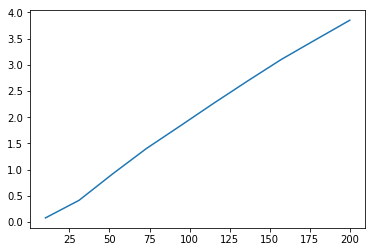

In [6]:
t = []
x = np.linspace(10, 200, 10, dtype=int)
for n in x:
    samples = []
    # take 10 samples to estimate mean time
    for _ in range(10):
        b = FindUnion(n)
        start = time.clock()
        b.iterate(1000)
        end = time.clock()
        samples.append(end - start)
    t.append(sum(samples)/10)
plt.plot(x, t)
plt.show()

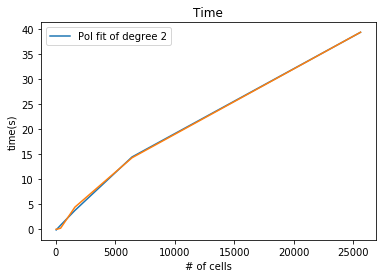

In [7]:
n = [5.,10.,20.,40.,80.,160.]
n_2 = [i**2 for i in n]
t = [2.86e-3,13.5e-3,216e-3,4.43, 14.3, 39.4]
deg = 2
p = np.poly1d(np.polyfit(n_2,t,deg))
plt.plot(n_2, p(n_2), label = "Pol fit of degree %i" % deg)
plt.plot(n_2,t)
plt.title('Time')
plt.xlabel('# of cells')
plt.ylabel('time(s)')
plt.legend()
plt.show()